<a href="https://colab.research.google.com/github/elianiva/imgpro-compvis/blob/master/week-6/histogram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

# Lena Histogram (Manual)

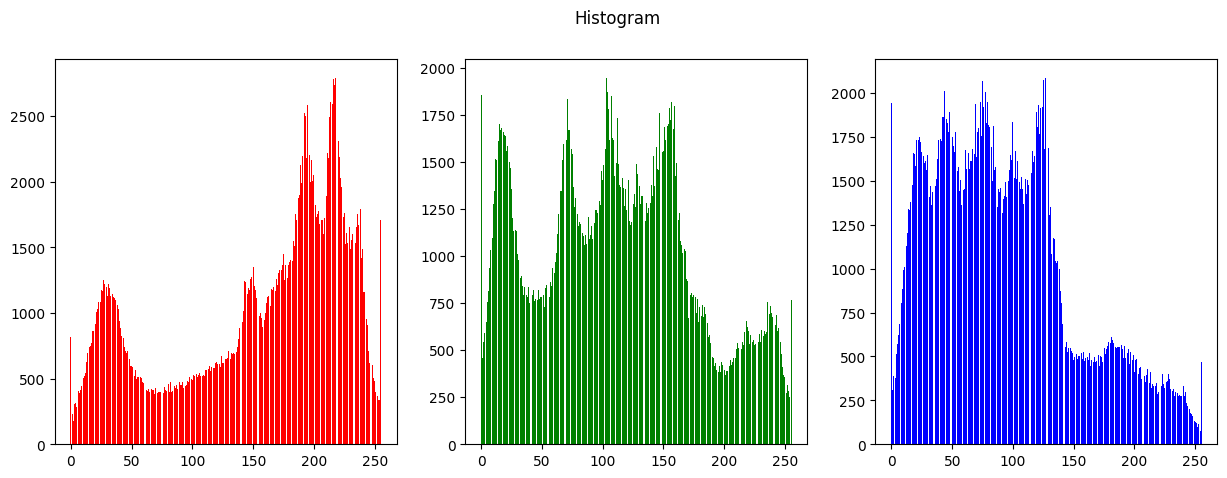

In [2]:
lena = cv.imread('/content/drive/MyDrive/PCVK/Images/lena.jpg')

# find the histogram of the image (manually)
red = lena[:, :, 2].flatten()
green = lena[:, :, 1].flatten()
blue = lena[:, :, 0].flatten()

red_hist = []
green_hist = []
blue_hist = []

# group based on frequency
for i in range(256):
  red_hist.append(np.sum(red == i))
  green_hist.append(np.sum(green == i))
  blue_hist.append(np.sum(blue == i))

fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (15, 5))
fig.suptitle('Histogram')
axes[0].bar(np.arange(256), red_hist, color = 'r')
axes[1].bar(np.arange(256), green_hist, color = 'g')
axes[2].bar(np.arange(256), blue_hist, color = 'b')
plt.show()

# Lena Histogram (NumPy)

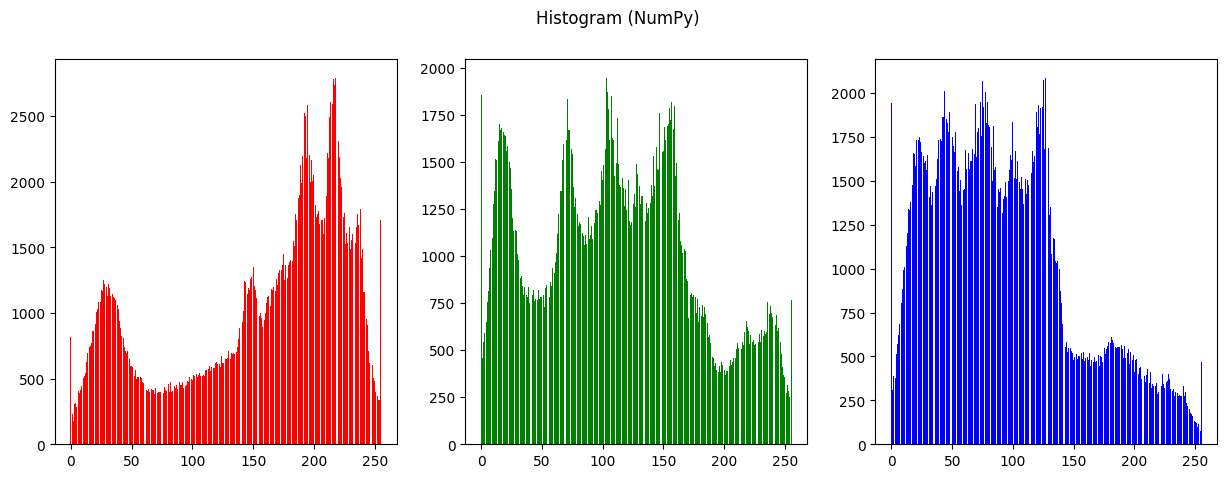

In [3]:
# find the histogram using np histogram function
lena = cv.imread('/content/drive/MyDrive/PCVK/Images/lena.jpg')
red = lena[:, :, 2].flatten()
green = lena[:, :, 1].flatten()
blue = lena[:, :, 0].flatten()

red_hist, red_bins = np.histogram(red, bins = 256, range = [0, 256])
green_hist, green_bins = np.histogram(green, bins = 256, range = [0, 256])
blue_hist, blue_bins = np.histogram(blue, bins = 256, range = [0, 256])

fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (15, 5))
fig.suptitle('Histogram (NumPy)')
axes[0].bar(np.arange(256), red_hist, color = 'r')
axes[1].bar(np.arange(256), green_hist, color = 'g')
axes[2].bar(np.arange(256), blue_hist, color = 'b')
plt.show()

# Histogram Equalization

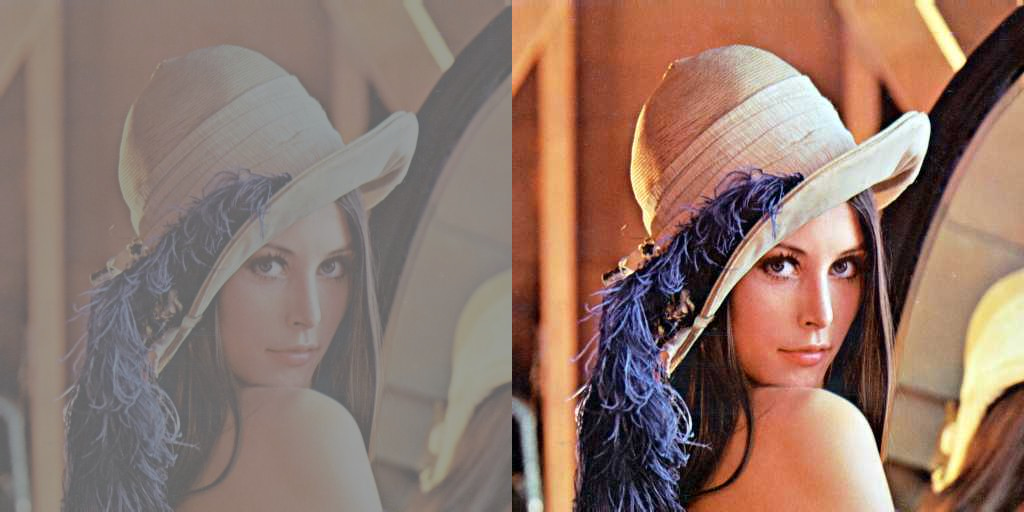

In [4]:
lena = cv.imread('/content/drive/MyDrive/PCVK/Images/lena.jpg')
lena_lc = cv.imread('/content/drive/MyDrive/PCVK/Images/lena_lc.jpg')
lena_merged = cv.hconcat([lena_lc, lena])
cv2_imshow(lena_merged)

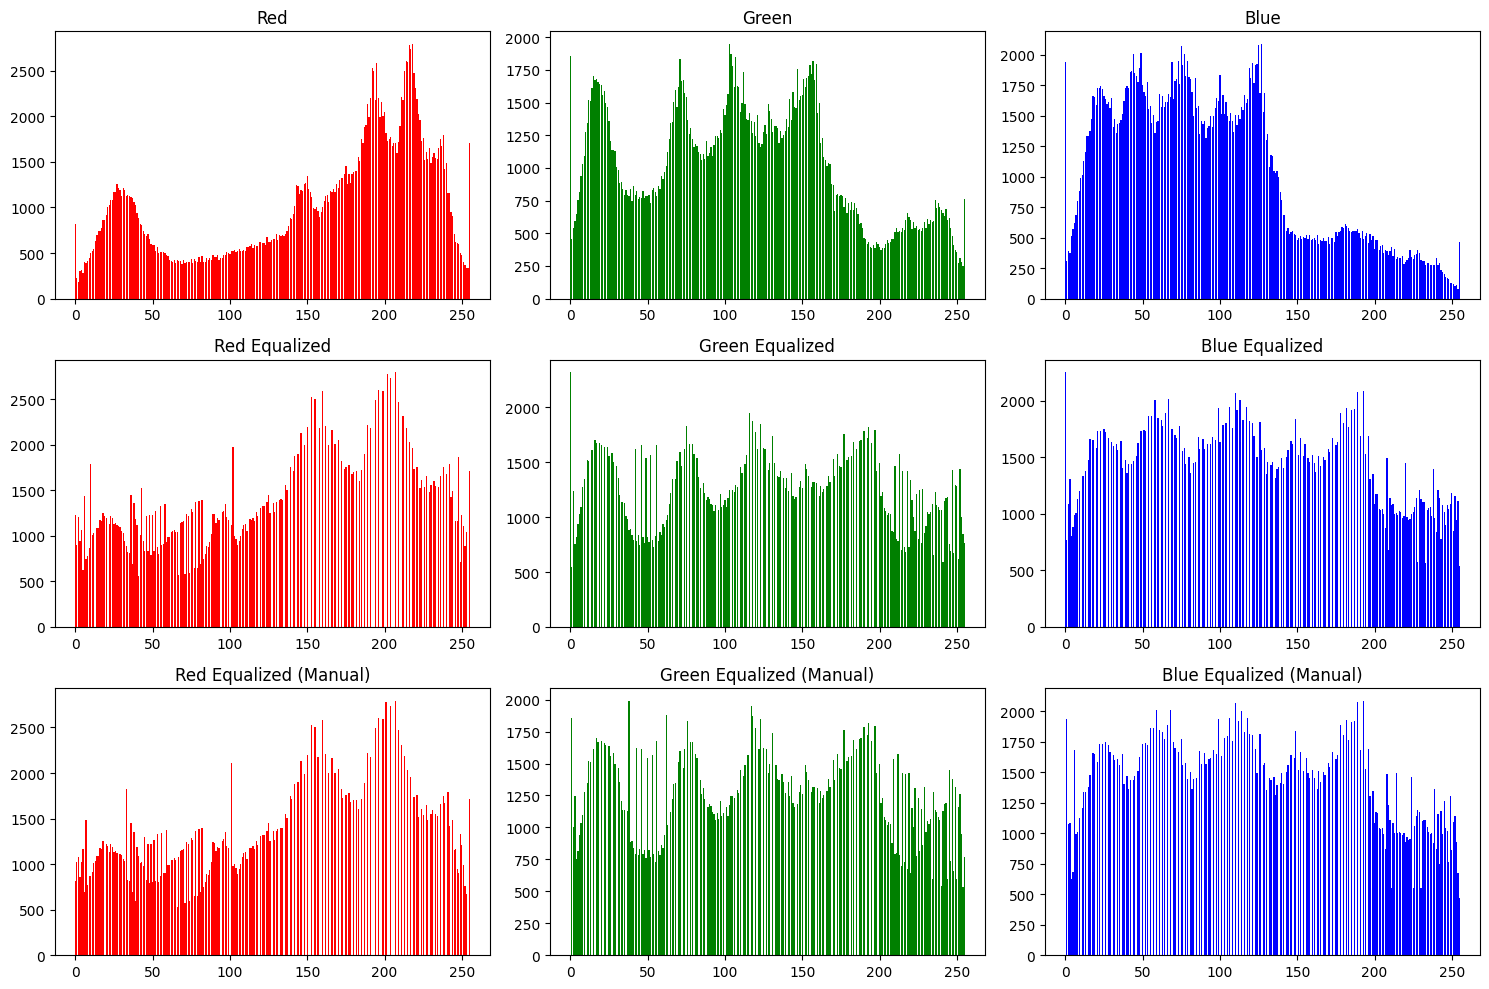

In [5]:
# histogram value
red = lena[:, :, 2].flatten()
green = lena[:, :, 1].flatten()
blue = lena[:, :, 0].flatten()
red_hist, red_bins = np.histogram(red, bins = 256, range = [0, 256])
green_hist, green_bins = np.histogram(green, bins = 256, range = [0, 256])
blue_hist, blue_bins = np.histogram(blue, bins = 256, range = [0, 256])

fig, axes = plt.subplots(3, 3, figsize=(15, 10))
axes[0, 0].bar(np.arange(256), red_hist, color = 'r')
axes[0, 0].set_title('Red')
axes[0, 1].bar(np.arange(256), green_hist, color = 'g')
axes[0, 1].set_title('Green')
axes[0, 2].bar(np.arange(256), blue_hist, color = 'b')
axes[0, 2].set_title('Blue')

# equalized histogram value
red_eq = cv.equalizeHist(red)
green_eq = cv.equalizeHist(green)
blue_eq = cv.equalizeHist(blue)

red_eq_hist, red_eq_bins = np.histogram(red_eq, bins = 256, range = [0, 256])
green_eq_hist, green_eq_bins = np.histogram(green_eq, bins = 256, range = [0, 256])
blue_eq_hist, blue_eq_bins = np.histogram(blue_eq, bins = 256, range = [0, 256])

axes[1, 0].bar(np.arange(256), red_eq_hist, color = 'r')
axes[1, 0].set_title('Red Equalized')
axes[1, 1].bar(np.arange(256), green_eq_hist, color = 'g')
axes[1, 1].set_title('Green Equalized')
axes[1, 2].bar(np.arange(256), blue_eq_hist, color = 'b')
axes[1, 2].set_title('Blue Equalized')

# manually equalized histogram value
red = lena[:, :, 2]
green = lena[:, :, 1]
blue = lena[:, :, 0]
red_hist = []
green_hist = []
blue_hist = []

# group based on frequency
for i in range(256):
  red_hist.append(np.sum(red == i))
  green_hist.append(np.sum(green == i))
  blue_hist.append(np.sum(blue == i))

total_pixel = lena.shape[0] * lena.shape[1]
red_cumulative_intensity = np.cumsum(red_hist) / total_pixel
green_cumulative_intensity = np.cumsum(green_hist) / total_pixel
blue_cumulative_intensity = np.cumsum(blue_hist) / total_pixel

red_normalized = (red_cumulative_intensity * 255).astype(np.uint8)
green_normalized = (green_cumulative_intensity * 255).astype(np.uint8)
blue_normalized = (blue_cumulative_intensity * 255).astype(np.uint8)

red_eq = red_normalized[red]
green_eq = green_normalized[green]
blue_eq = blue_normalized[blue]

red_eq_hist = []
green_eq_hist = []
blue_eq_hist = []

for i in range(256):
  red_eq_hist.append(np.sum(red_eq == i))
  green_eq_hist.append(np.sum(green_eq == i))
  blue_eq_hist.append(np.sum(blue_eq == i))

axes[2, 0].bar(np.arange(256), red_eq_hist, color = 'r')
axes[2, 0].set_title('Red Equalized (Manual)')
axes[2, 1].bar(np.arange(256), green_eq_hist, color = 'g')
axes[2, 1].set_title('Green Equalized (Manual)')
axes[2, 2].bar(np.arange(256), blue_eq_hist, color = 'b')
axes[2, 2].set_title('Blue Equalized (Manual)')

fig.tight_layout()

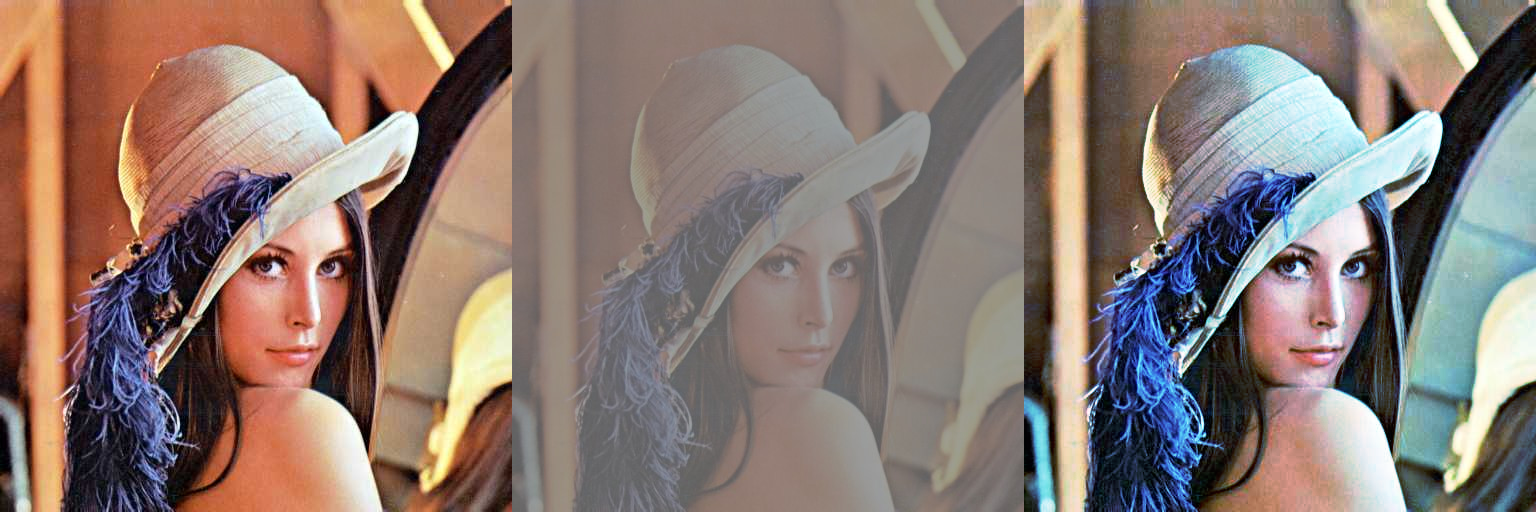

In [6]:
# show the image side by side
lena_eq = cv.merge([red_eq, green_eq, blue_eq])
lena_eq = cv.cvtColor(lena_eq, cv.COLOR_BGR2RGB)
lena_merged = cv.hconcat([lena, lena_lc, lena_eq])
cv2_imshow(lena_merged)

The output is different compared to using `equalizeHist` because we manipulate each colour independently which affects the colour composition, whereas if we're using `equalizeHist`, it manipulates the histogram globally hence not affecting the overall colour

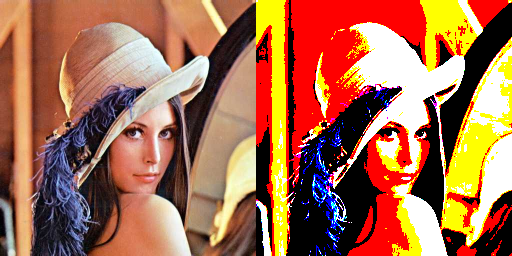

In [16]:
lena = cv.imread('/content/drive/MyDrive/PCVK/Images/lena.jpg')
lena = cv.resize(lena, (0, 0), fx=0.5, fy=0.5)

depth = 8 # color depth in bit
step_size = 256 / depth # quantisation level

colors = np.array([
    [0, 0, 0],      # Black
    [255, 255, 255],  # White
    [255, 0, 0],    # Red
    [0, 255, 0],    # Green
    [0, 0, 255],    # Blue
    [255, 255, 0],  # Yellow
    [255, 0, 255],  # Magenta
    [0, 255, 255]   # Cyan
])

lena_reshaped = lena.reshape((-1, 3))
colors_reshaped = colors.reshape((-1, 3))

distances = np.sqrt(np.sum((lena_reshaped[:, np.newaxis, :] - colors_reshaped)**2, axis=2))
nearest_color_indices = np.argmin(distances, axis=1)
lena_posterized = colors[nearest_color_indices].reshape(lena.shape)

lena_posterized = lena_posterized.astype(np.uint8)

lena_merged = cv.hconcat([lena, lena_posterized])
cv2_imshow(lena_merged)

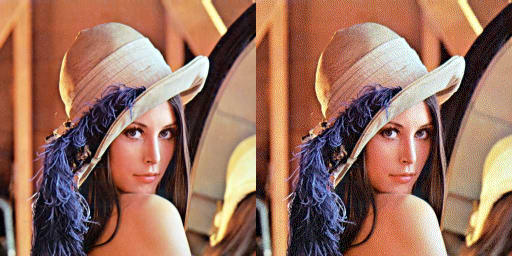

In [15]:
def floyd_steinberg_dithering(image):
    # Convert image to float32 for accurate calculations
    image = image.astype(np.float32)
    height, width, channels = image.shape
    dithered = image.copy()

    for y in range(height-1):
        for x in range(width-1):
            for c in range(channels):
                old_pixel = dithered[y, x, c]
                # Quantize to nearest color level (using 8 levels per channel)
                new_pixel = np.round(old_pixel / 32.0) * 32.0
                dithered[y, x, c] = new_pixel

                # Calculate quantization error
                error = old_pixel - new_pixel

                # Distribute error to neighboring pixels using Floyd-Steinberg weights
                # Right pixel: 7/16
                dithered[y, x+1, c] = dithered[y, x+1, c] + error * 7/16
                # Bottom-left pixel: 3/16
                if x > 0:
                    dithered[y+1, x-1, c] = dithered[y+1, x-1, c] + error * 3/16
                # Bottom pixel: 5/16
                dithered[y+1, x, c] = dithered[y+1, x, c] + error * 5/16
                # Bottom-right pixel: 1/16
                dithered[y+1, x+1, c] = dithered[y+1, x+1, c] + error * 1/16

    # Clip values to valid range [0, 255]
    dithered = np.clip(dithered, 0, 255)
    # Convert back to uint8
    return dithered.astype(np.uint8)

lena = cv.imread('/content/drive/MyDrive/PCVK/Images/lena.jpg')
lena = cv.resize(lena, (0, 0), fx=0.5, fy=0.5)
dithered_lena = floyd_steinberg_dithering(lena)
cv2_imshow(np.hstack([lena, dithered_lena]))

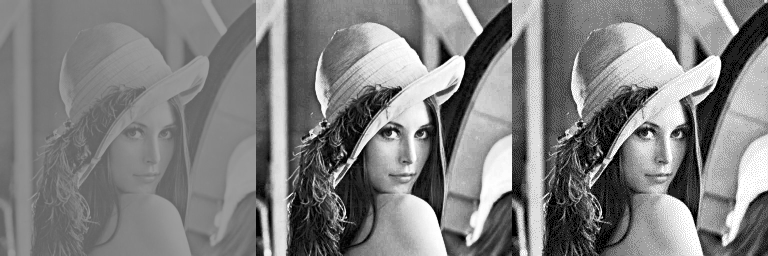

In [23]:
def convert_to_grayscale(image):
    if len(image.shape) == 3:
        return cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    return image

def equalize_histogram(image):
    return cv.equalizeHist(image)

def floyd_steinberg_dithering(image):
    image = image.astype(np.float32)
    height, width = image.shape
    dithered = image.copy()

    levels = 8
    step = 256 / levels

    for y in range(height-1):
        for x in range(width-1):
            old_pixel = dithered[y, x]
            new_pixel = np.round(old_pixel / step) * step
            dithered[y, x] = new_pixel

            error = old_pixel - new_pixel

            # Distribute error to neighboring pixels
            # Right pixel (7/16)
            dithered[y, x+1] = dithered[y, x+1] + error * 7/16
            # Bottom-left pixel (3/16)
            if x > 0:
                dithered[y+1, x-1] = dithered[y+1, x-1] + error * 3/16
            # Bottom pixel (5/16)
            dithered[y+1, x] = dithered[y+1, x] + error * 5/16
            # Bottom-right pixel (1/16)
            dithered[y+1, x+1] = dithered[y+1, x+1] + error * 1/16

    dithered = np.clip(dithered, 0, 255)
    return dithered.astype(np.uint8)

def process_image(image_path):
    image = cv.imread(image_path)
    if image is None:
        raise ValueError("Could not load image from path: " + image_path)
    image = cv.resize(image, (0, 0), fx=0.5, fy=0.5)

    gray = convert_to_grayscale(image)
    equalized = equalize_histogram(gray)
    dithered = floyd_steinberg_dithering(equalized)
    result = np.hstack([gray, equalized, dithered])

    return gray, equalized, dithered, result

image_path = '/content/drive/MyDrive/PCVK/Images/lena_lc.jpg'
gray, equalized, dithered, result = process_image(image_path)

cv2_imshow(result)